<a href="https://colab.research.google.com/github/SolbiChoi/TeamProject/blob/master/living_good_fin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install konlpy wordcloud

In [ ]:
import pandas as pd
from konlpy.tag import Okt, Komoran, Kkma, Hannanum, Twitter, Mecab
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

In [ ]:
text = pd.read_excel('./living_scraping.xlsx')
grade_4 = text['star grade'] >= 4.0

df_grade4 = text[grade_4]
df_grade4['star grade'].value_counts()

df_grade4.head(10)

,star grade,review
0,5.0,아주 잘 사용하고 있음\n입구가 넓어 세척도 편하고\n뚜껑도 딱 닫으면 세지 않아 ...
3,4.0,그냥 잘 사용하고 있어요
4,5.0,이뻐서 들고다니면서 보니까 좋으네요 용량도 크고 빨대도 있어서 더 좋아요
7,4.0,칼라만 이뻐요 보온력은 별루네요
15,5.0,채도와명도가 분명한 빨강은 아니지만 먀우 만족합니다. 너무길지않아 안정감도 있고 특...
16,4.5,커피를 너무 좋아하는1인 입니다.커피를 천천히 마시는 편이라 컵에 물방울이 생겨 불...
20,5.0,가방에 넣어도 안새는 텀블러를 원했는데 너무 만족해요!\n얼음 넣어 놓으면 시원하게...
23,4.0,저는 쿠폰을 써서 저렴하게 사서 가성비 만족하는 편입니다
24,4.5,잘 쓰고 있습니다. 빨대에 먼지가 묻는 건 빨대 재질 특성 상 어쩔 수 없는 것 같...
25,5.0,만족하면서 사용하고있어요


In [ ]:
x_data = text['review']
y_data = text['star grade']

In [ ]:
def make_y_data(val):
    if (1 <= val < 2):
        return 1
    elif (2 <= val < 3):
        return 2
    elif (3 <= val < 4):
        return 3
    elif (4 <= val < 5):
        return 4
    elif (5 <= val < 6):
        return 5
    else:
        return None

In [ ]:
y_data = y_data.apply(lambda val:make_y_data(val))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5641,), (5641,), (1881,), (1881,))

In [ ]:
!curl -O https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5064  100  5064    0     0   235k      0 --:--:-- --:--:-- --:--:--  235k


In [ ]:
!bash ./mecab.sh

mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.


In [ ]:
x_train.str.replace('[^가-힣ㄱ-ㅎㅠ ]','')

2829                                   녹이 쓸면 최악입니다 교환해주세요
3640    밸런스온  시트  앵콜 펀딩 알람 신청 했습니다제품 이렇게 빨리 받을 줄 몰랐는데 ...
1523      굴곡이 심하거나 마찰이 큰 바닥만 아니면 단언컨데 이보다 완벽한 빗자루는 없을 겁니다
4447    상품 배송 사은품 뭐하나 지켜진게 아무것도 없네요공지한 포장변경도 전혀이뤄지지 않았...
5467    건조가 빨리 되어 청결 면에서 맘에 들어요 거품도 잘 나구요 헹굴 때도 기존 타월에...
                              ...                        
3051                                         별 한개 주기도 아까움
3724    일단 굉자히 기대를 많이 했었는데이틀정도 착용하고 방치중입니다없던 목통증도 생겼구요...
2516                                         편리한지 잘 모르겠네요
2386                         와인용으로 사용해 보니 너무 좋았어요소주용도 좋네요
6191    평점이 낮은데 저는 개인적으로 만족합니다 바로 직전에 쓰던 의자가 주워온 싸구려 나...
Name: review, Length: 5641, dtype: object

In [ ]:
from konlpy.tag import Mecab
mecab = Mecab()

In [ ]:
stopwords = ['의', '은', '는', '이', '있', '하', '것', '들', '그', '되', '수', '이', '보', '않', '없', '나', '사람', '주', '아니', '등', '같', '우리'
, '때', '년', '가', '한', '지', '대하', '오', '말', '일', '그렇', '위하', '때문', '그것', '두', '말하', '알', '그러나'
, '받', '못하', '일', '그런', '또', '문제', '더', '사회', '많', '그리고', '좋', '크', '따르', '중', '나오', '가지', '씨'
, '시키', '만들', '지금', '생각하', '그러', '속', '하나', '집', '살', '모르', '적', '월', '데', '자신', '안', '어떤', '내'
, '경우', '명', '생각', '시간', '그녀', '다시', '이런', '앞', '보이', '번', '나', '다른', '어떻', '여자', '개', '전', '들'
, '사실', '이렇', '점', '싶', '말', '정도', '좀', '원', '잘', '통하', '소리', '놓', '걍', '과', '를', '으로', '자', '에', '와', '한', '하다']

In [ ]:
import pickle
pickle.dump(stopwords, open('./stopwords.pkl','wb'))

In [ ]:
sentence = list()

for tok in x_train:
  encoded = mecab.morphs(tok)
  sentence.append([item for item in encoded if item not in stopwords])

sentence

[['녹', '쓸', '면', '최악', '입니다', ',', '교환', '해', '세요'],
 ['⭐',
  '️',
  '밸런스',
  '온',
  'FIT',
  '시트',
  'L',
  '앵',
  '콜',
  '펀딩',
  '알람',
  '신청',
  '했',
  '습니다',
  '!',
  '⭐',
  '️',
  '제품',
  '이렇게',
  '빨리',
  '을',
  '줄',
  '몰랐',
  '는데',
  '빠른',
  '배송',
  '우선',
  '너무',
  '았',
  '습니다',
  '!',
  '고',
  '몇',
  '앉',
  '아',
  '봤',
  '는데',
  '확실히',
  '기존',
  '방석',
  '비해서',
  '엉덩이',
  '편안',
  '느낌',
  '어요',
  '~',
  '평소',
  '앉',
  '아',
  '다',
  '니',
  '메모리',
  '폼',
  '방석',
  '여러',
  '방석',
  '을',
  '깔',
  '고',
  '앉',
  '아',
  '봤',
  '지만',
  '밸런스',
  '온',
  '방석',
  '확실히',
  '엉덩이',
  '아픔',
  '도',
  '덜하',
  '고',
  '오랜',
  '앉',
  '아',
  '어도',
  '편안',
  '해요',
  '!',
  '개인차',
  '을',
  '겠',
  '지만',
  '만족',
  '스러운',
  '제품',
  '입니다',
  '.',
  'p',
  '.',
  's',
  '하루',
  '사용',
  '해',
  '본',
  '결과',
  '방석',
  '냄새',
  '계속',
  '해서',
  '게',
  '조금',
  '신경',
  '쓰이',
  '긴',
  '네요',
  '.'],
 ['굴곡',
  '심하',
  '거나',
  '마찰',
  '큰',
  '바닥',
  '만',
  '면',
  '단언',
  '컨데',
  '보다',
  '완벽',
  '빗자루',
  '을',
  '겁니다',
  '.'

In [ ]:
import tensorflow as tf
tokenizer = tf.keras.preprocessing.text.Tokenizer()

In [ ]:
tokenizer.fit_on_texts(sentence)

In [ ]:
text = tokenizer.word_index

In [ ]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt 
import nltk 
from nltk.corpus import stopwords

In [ ]:
%matplotlib inline 
import matplotlib 
from IPython.display import set_matplotlib_formats 
matplotlib.rc('font',family = 'Malgun Gothic') 
set_matplotlib_formats('retina') 
matplotlib.rc('axes',unicode_minus = False)

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(
font_path = './NanumGothicExtraBold.ttf', background_color='white',
colormap = "hot", width=3000, height=2000).generate_from_frequencies(text)

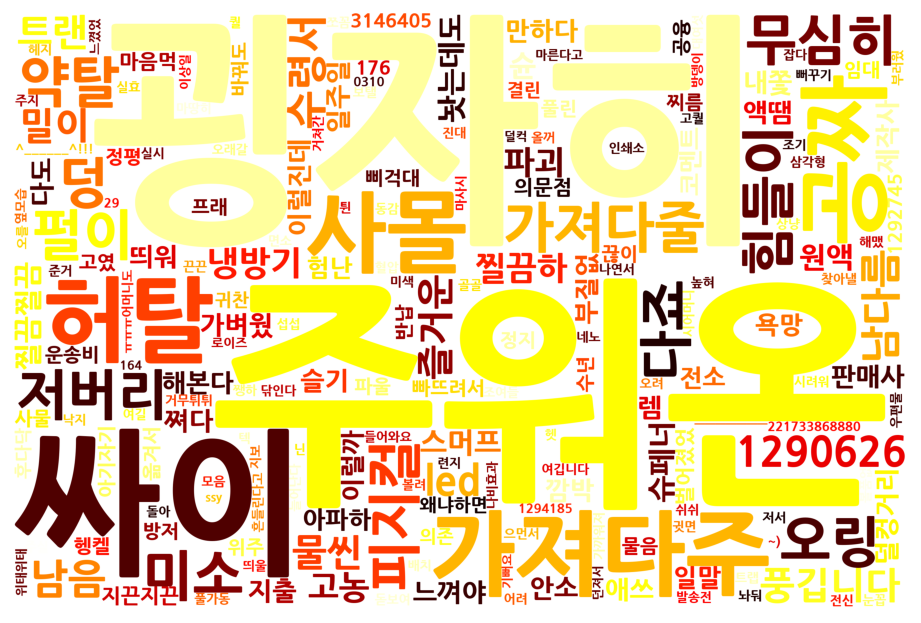

In [ ]:

plt.imshow(wordcloud) 

figure = plt.gcf() # get current figure
figure.set_size_inches(8, 6)
plt.axis('off') 
plt.show()